In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [21]:
# Load the data
X = np.load("X.npy")

# Print the shape
print(np.shape(X))

(3023, 1850)


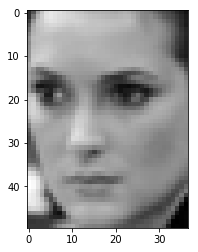

In [22]:
# Select and reshape the first person
firstPerson = X[0].reshape((50, 37))

# Print the first person
plt.imshow(firstPerson, cmap="gray")

# Show the image
plt.show()

In [23]:
# Apply SVD with full matrices
u1, s1, vh1 = np.linalg.svd(X, full_matrices=True)

print('Dimensão de U: ', np.shape(u1))
print('Dimensão de D: ', np.shape(np.diag(s1)))
print('Dimensão de V: ', np.shape(vh1))

# Apply SVD without full matrices
u2, s2, vh2 = np.linalg.svd(X, full_matrices=False)

# Get the diagonal matrix
d = np.diag(s2)

print('Dimensão de U: ', np.shape(u2))
print('Dimensão de D: ', np.shape(d))
print('Dimensão de V: ', np.shape(vh2))

Dimensão de U:  (3023, 3023)
Dimensão de D:  (1850, 1850)
Dimensão de V:  (1850, 1850)
Dimensão de U:  (3023, 1850)
Dimensão de D:  (1850, 1850)
Dimensão de V:  (1850, 1850)


In [24]:
# Calculate the product of SVD
c = np.dot(np.dot(u2, d), vh2)

# Calculate the error in matrix
error = X - c

# Calculate the max error in matrix
maxError = np.amax(abs(error))

# Calculate the mean error in matrix
meanDados = np.sum(abs(X))/np.size(X)

print('Maior erro: ', maxError)
print('Média dos dados:', meanDados)


Maior erro:  0.00047302246
Média dos dados: 129.54883765008807


In [25]:
# Calculate the matrix reduzida
XD =  np.dot(u2[:, 0:150], d[0:150, 0:150])

# Calculate the matrix reconstruida
XC =  np.dot(np.dot(u2[:, 0:150], d[0:150, 0:150]), vh2[0:150, :])

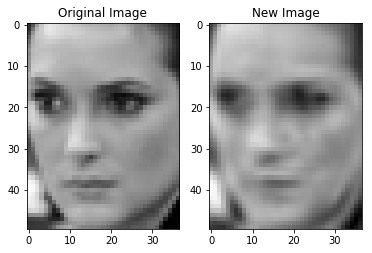

In [29]:
# Get the first person from the new matrix
firstPersonC = XC[0].reshape((50, 37))


# Create the figure
fig = plt.figure()

# Print the first person
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(firstPerson,cmap="gray")
a.set_title('Original Image')

# Print the first person of the new matrix
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(firstPersonC,cmap="gray")
a.set_title('New Image')



# Show the image
plt.show()

In [33]:
tsvd = TruncatedSVD(n_components=150)
T_u_sigma = tsvd.fit_transform(X)
T_Sigma = tsvd.singular_values_
T_vth = tsvd.components_
T_d = np.diag(T_Sigma)
T_u = np.dot(T_u_sigma,np.linalg.inv(T_d))

print(np.shape(T_u_sigma))
print(np.shape(T_vth))

### Criando a matriz reduzida usando o TruncatedSVD
T_XD = np.dot(T_u,T_d)

## Criando a matriz reconstruida usando o TruncatedSVD
T_XC = np.dot(np.dot(T_u,T_d),T_vth)

(3023, 150)
(150, 1850)


Text(0.5, 1.0, 'New Image')

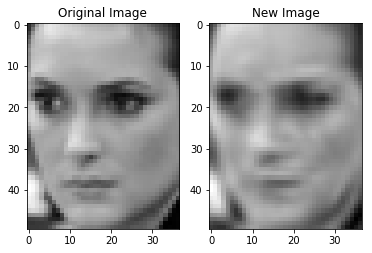

In [34]:
# Imprimindo a imagem da primeira pessoa reconstruida

# Get the first person from the new matrix
firstPersonT_C = T_XC[0].reshape((50, 37))


# Create the figure
fig = plt.figure()

# Print the first person
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(firstPerson,cmap="gray")
a.set_title('Original Image')

# Print the first person of the new matrix
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(firstPersonT_C,cmap="gray")
a.set_title('New Image')


In [ ]:
#for k in range(0,150,25):
#	fig7 = plt.figure(figsize=(5, 5))
#	cont = 1
#	for i in range(k,k+25):
#		print(i)
#		fig7.add_subplot(5,5,cont)
#		cont = cont + 1
#		plt.imshow(T_vth[i].reshape((50, 37)), cmap="gray")

#	plt.xlabel('EigenFaces')
#	plt.show()